In [96]:
pwd

'/home/kkt/src/TFDWT.pypi/Tutorials'

In [97]:
!python --version

Python 3.12.7


GPU availability?

In [98]:
import tensorflow as tf
print(f"TensorFlow version {tf.__version__}")
print("CUDA Version:", tf.sysconfig.get_build_info()['cuda_version'])
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

TensorFlow version 2.18.0
CUDA Version: 12.5.1
Num GPUs Available:  1


1

Select one GPU

        Restrict code to use a particular GPU...

In [99]:
# # include ../dirx 
mylibpath = [
    '/home/kkt/src'
    #'/home/k/PLAYGROUND10GB/SKULSTRIPpaper__'
    ]
import sys
[sys.path.insert(0,_) for _ in mylibpath]
del mylibpath

from tf_select_a_gpu import select_a_gpu

In [100]:
# select_gpu = gpus[gpu_id]
memory_limit = 8 #GB
select_a_gpu(gpus, gpu_id = 0, memory_limit=memory_limit)
# del gpu_id, select_a_gpu, select_gpu

1 Physical GPUs available 
Selected 1 Logical GPU with 8 GB memory limit


## 1D: DWT, IDWT \& Perfect Reconstruction of sequences

In [101]:
from TFDWT.DWTIDWT1Dv1 import DWT1D, IDWT1D

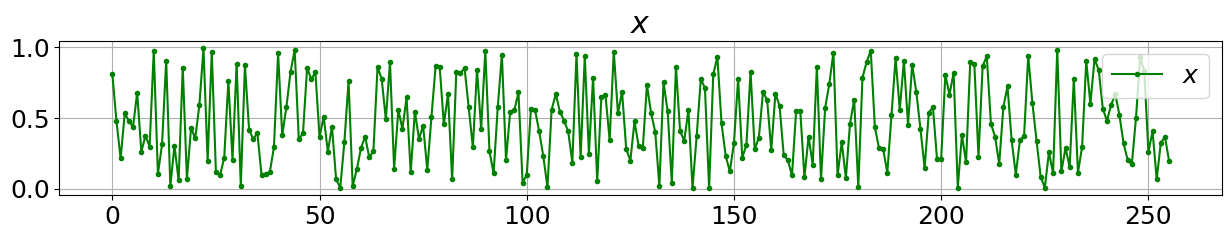

Raw x shape (256,)


In [102]:
# 1D dwt
N = 256 # length of the sequence
input_shape = (N,1)
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '18'
x = np.random.rand(input_shape[0])
# x = tmpx
plt.figure(figsize=(15,2))
plt.plot(x, 'g.-',label='$x$')
plt.legend(), plt.grid()
plt.title('$x$')
plt.show()
print(f"Raw x shape {x.shape}")


    DWT 1D 

In [103]:
mother_wavelet = 'bior3.1' # max 'db8' for lenght 16 signal
# mother_wavelet = 'haar' # max 'db8' for lenght 16 signal
# mother_wavelet = 'db10' # max 'db8' for lenght 16 signal

newx = tf.expand_dims(tf.expand_dims(x,-1),0)
print(f'x shape {newx.shape}')
dwtout = DWT1D(wave=mother_wavelet)(newx)
print(f'DWT(x) shape {dwtout.shape}, \nDWT(x) := {dwtout}')


x shape (1, 256, 1)
DWT(x) shape (1, 128, 2), 
DWT(x) := [[[ 7.69093215e-01  3.08567315e-01]
  [ 2.59399414e-01 -9.08061266e-02]
  [ 8.42859447e-01 -6.84219599e-02]
  [ 9.21697497e-01  1.66628420e-01]
  [ 3.29772681e-01  1.26891553e-01]
  [ 1.17942142e+00  4.06183243e-01]
  [-2.21871257e-01  1.22757390e-01]
  [ 7.65555978e-01 -4.68225390e-01]
  [ 7.44460300e-02 -2.77814567e-01]
  [ 8.08168888e-01 -4.83342022e-01]
  [ 6.02372408e-01 -1.32226169e-01]
  [ 1.48338521e+00  2.42191106e-01]
  [ 8.44885588e-01  5.64455152e-01]
  [-1.97207063e-01  1.21681988e-01]
  [ 9.34306085e-01  2.68267363e-01]
  [ 8.78562272e-01  4.90912646e-01]
  [ 4.87686604e-01  5.33254564e-01]
  [ 3.66508096e-01  4.83428538e-02]
  [ 3.63476694e-01 -1.14408091e-01]
  [ 9.42421257e-02 -2.86258906e-02]
  [ 1.15468061e+00  3.05265278e-01]
  [ 3.81822556e-01  1.29103482e-01]
  [ 1.58810651e+00  1.22469425e-01]
  [ 1.37041867e-01  4.38739061e-02]
  [ 1.29866743e+00 -1.19005442e-01]
  [ 8.07668686e-01 -1.95497215e-01]
  [ 5.3

    IDWT 1D

IDWT(DWT(x)) shape (1, 256, 1) 
IDWT(DWT(x)) := [[[0.8131189 ]
  [0.47893453]
  [0.2144416 ]
  [0.53331715]
  [0.47844386]
  [0.43687487]
  [0.6789732 ]
  [0.26214623]
  [0.37436393]
  [0.29781932]
  [0.973682  ]
  [0.10423282]
  [0.313414  ]
  [0.9068049 ]
  [0.02075194]
  [0.30393758]
  [0.05856675]
  [0.8561959 ]
  [0.06916906]
  [0.43168142]
  [0.3558096 ]
  [0.5895377 ]
  [0.9933573 ]
  [0.19722858]
  [0.9688806 ]
  [0.11527306]
  [0.09479509]
  [0.2191096 ]
  [0.76177657]
  [0.20524688]
  [0.88429713]
  [0.02190617]
  [0.871935  ]
  [0.41784048]
  [0.3503492 ]
  [0.3959926 ]
  [0.09819511]
  [0.10414661]
  [0.11581014]
  [0.29511815]
  [0.9579969 ]
  [0.37760526]
  [0.57686764]
  [0.8254645 ]
  [0.98083305]
  [0.3501818 ]
  [0.39086163]
  [0.8546843 ]
  [0.77439374]
  [0.82318646]
  [0.36620176]
  [0.5093389 ]
  [0.26325458]
  [0.43902457]
  [0.06603148]
  [0.0079605 ]
  [0.33200005]
  [0.75993997]
  [0.01936077]
  [0.13806517]
  [0.28719467]
  [0.36898714]
  [0.2213746 ]
  [0.26

([<matplotlib.lines.Line2D at 0x7ff3cc8e90a0>],
 Text(0.5, 1.0, 'reconstuction using bior3.1'))

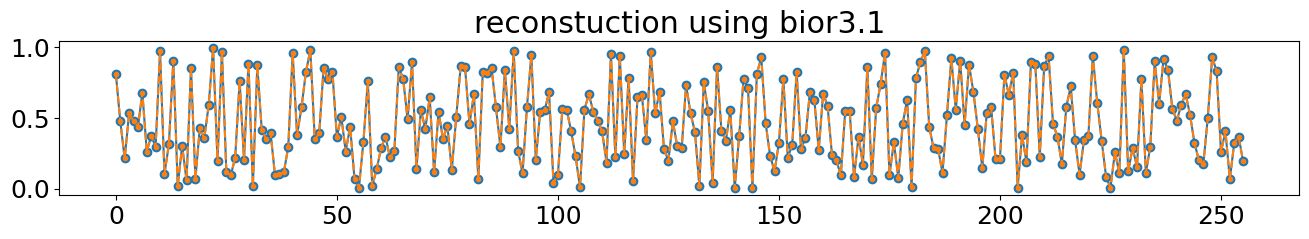

In [104]:
# print(dwtout.shape)
idwtout = IDWT1D(wave=mother_wavelet)(dwtout)
print(f'IDWT(DWT(x)) shape {idwtout.shape} \nIDWT(DWT(x)) := {idwtout}')

print(f'Check perfect reconstruction \nIDWT(DWT(x)) := {idwtout.numpy()} \n\nInput x is {x} ')

    

plt.figure(figsize=(16,2))
plt.plot(x,'o-')
plt.plot(idwtout.numpy()[0,:], '.--'), plt.title(f"reconstuction using {mother_wavelet}")

## 2D: DWT, IDWT \& Perfect Reconstruction of Images

In [105]:
from TFDWT.DWTIDWT2Dv1 import DWT2D, IDWT2D

raw x shape: (814, 800)
x shape: (512, 512)


Text(0.5, 1.0, 'input $x$')

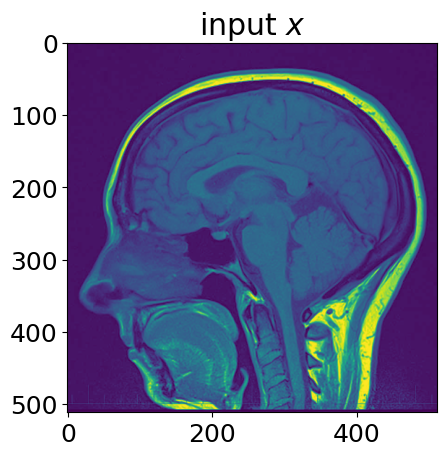

In [106]:
import cv2
x = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/brain.png',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x.shape)
x = cv2.resize(x, (512,512))
print('x shape:', x.shape)
#x = x/np.max(x)

import matplotlib.pyplot as plt
plt.imshow(x,label='$x$')
plt.title('input $x$')

raw x shape: (256, 256)


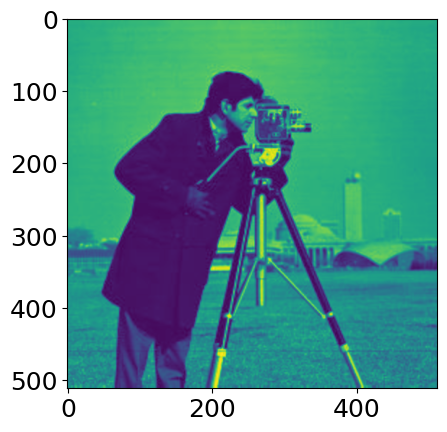

In [107]:
x1 = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/cameraman.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x1.shape)
x1 = cv2.resize(x1, (512,512))
# print('x shape:', x.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x1,label='$x$')

raw x shape: (256, 256)
x shape: (512, 512)


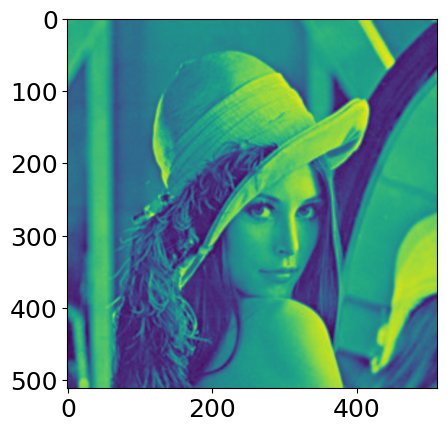

In [108]:
x2 = cv2.imread(f'/home/kkt/src/TFDWT.pypi/Tutorials/lena.jpg',cv2.IMREAD_GRAYSCALE) #test.jpg
print('raw x shape:', x2.shape)
x2 = cv2.resize(x2, (512,512))
print('x shape:', x2.shape)
#x = x/np.max(x)

# import matplotlib.pyplot as plt
plt.imshow(x2,label='$x$')

    Sample input for 2D TensorFlow layer

In [109]:
x.shape
xnew = tf.expand_dims(tf.expand_dims(x, axis=-1), axis=0)
xnew.shape

xnew1 = tf.expand_dims(tf.expand_dims(x1, axis=-1), axis=0)
xnew1.shape

xnew2 = tf.expand_dims(tf.expand_dims(x2, axis=-1), axis=0)
xnew2.shape


# xnew1 = tf.transpose(xnew, perm=[0,2,1,3])
# xnew1.shape
# del x, x1

xnew = tf.cast(xnew, dtype=tf.float32)/255
xnew1 = tf.cast(xnew1, dtype=tf.float32)/255
xnew2 = tf.cast(xnew2, dtype=tf.float32)/255
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))
print(tf.reduce_min(xnew1)), print(tf.reduce_max(xnew1))
print(tf.reduce_min(xnew2)), print(tf.reduce_max(xnew2))

_1 = tf.concat([xnew,xnew1,xnew2],axis=-1)
_2 = tf.concat([xnew2,xnew,xnew1],axis=-1)
xnew = tf.cast(tf.concat([_1,_2], axis=0), dtype=tf.float32)
_1.shape,_2.shape, xnew.shape, _1.dtype,_2.dtype, xnew.dtype
# del _1, _2

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.003921569, shape=(), dtype=float32)
tf.Tensor(0.99215686, shape=(), dtype=float32)
tf.Tensor(0.09803922, shape=(), dtype=float32)
tf.Tensor(0.9254902, shape=(), dtype=float32)


(TensorShape([1, 512, 512, 3]),
 TensorShape([1, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 tf.float32,
 tf.float32,
 tf.float32)

In [110]:
print(tf.reduce_min(xnew)), print(tf.reduce_max(xnew))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


(None, None)

    DWT 2D

(2, 256, 256, 12)
tf.Tensor(-0.31083655, shape=(), dtype=float32)
tf.Tensor(2.4014206, shape=(), dtype=float32)


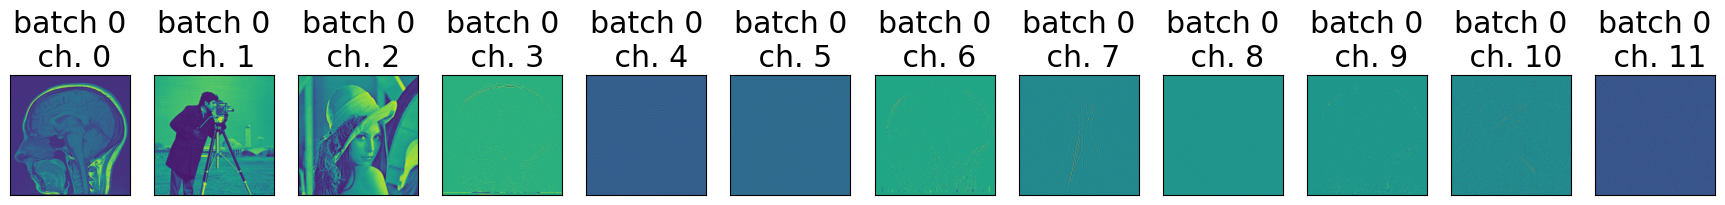

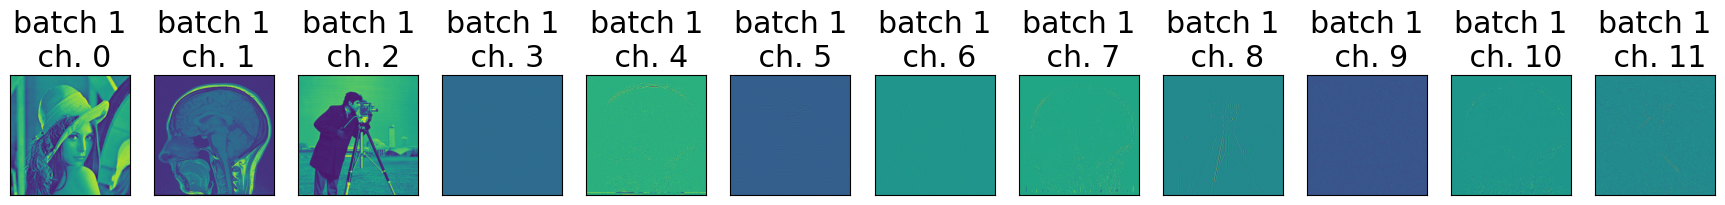

In [124]:
wave = 'haar'
wave = 'db6'
wave = 'bior3.1'
coeffs = DWT2D(wave=wave)(xnew)
print(coeffs.shape)
print(tf.reduce_min(coeffs)), print(tf.reduce_max(coeffs))
# import matplotlib.pyplot as plt
_ = coeffs
for b in range(_.shape[0]):
    plt.figure(figsize=(22,8))
    for c in range(_.shape[-1]):
        plt.subplot(1, _.shape[-1], c+1), 
        plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\n ch. {c}')
        # plt.imshow(_[b,:,:,c]>0.001), plt.title(f'batch {b}\n ch. {c}')
        plt.xticks([])
        plt.yticks([])
    plt.show()    

(2, 256, 256, 12)
tf.Tensor(-0.31083655, shape=(), dtype=float32)
tf.Tensor(2.4014206, shape=(), dtype=float32)


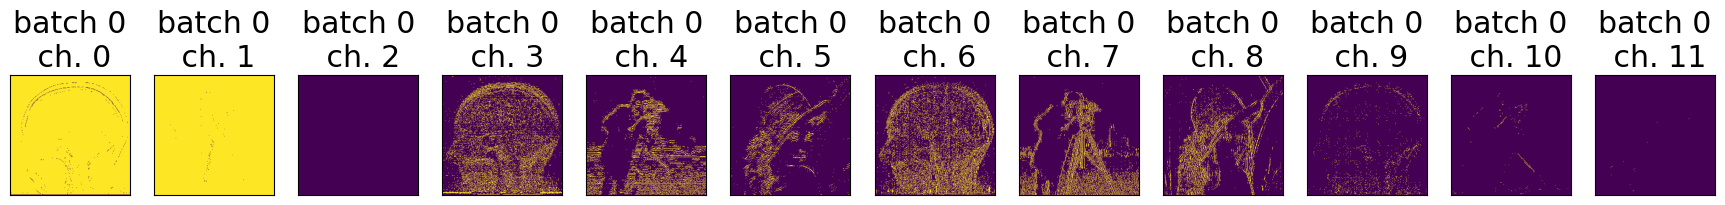

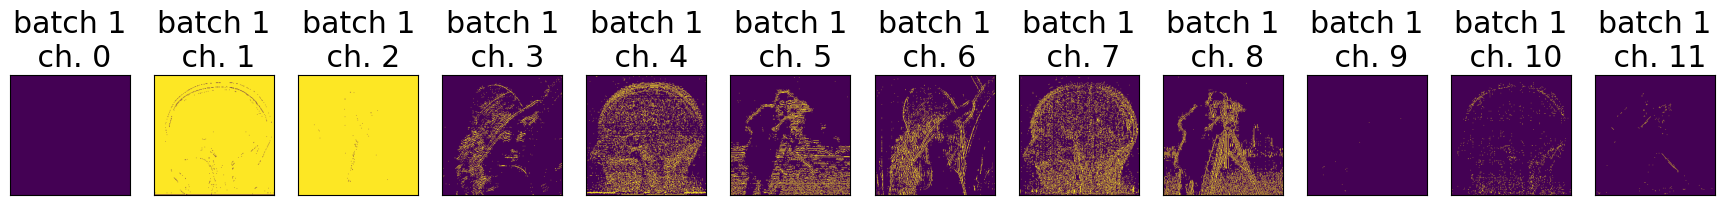

In [112]:
coeffs.shape

TensorShape([2, 256, 256, 12])

    IDWT 2D

(2, 512, 512, 3) <dtype: 'float32'>


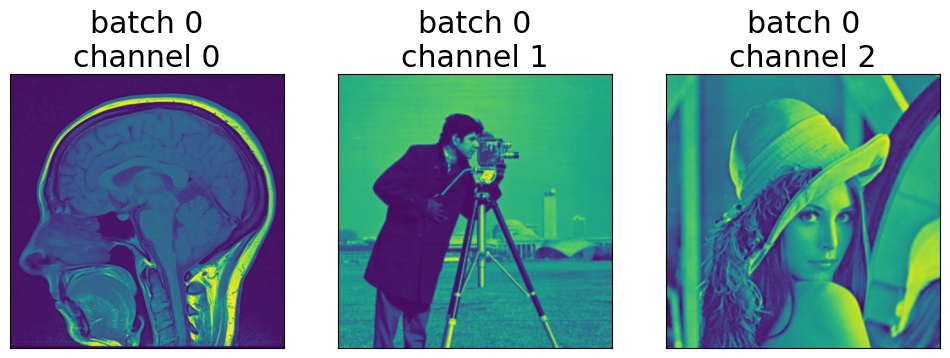

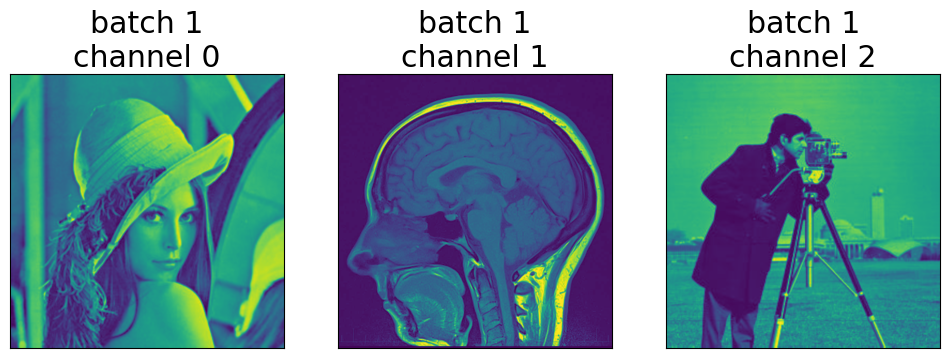

In [113]:
out = IDWT2D(wave=wave)(coeffs)
# [_.shape for _ in out]
print(out.shape, out.dtype)
# import matplotlib.pyplot as plt
_ = out
for b in range(_.shape[0]):
    plt.figure(figsize=(12,4))
    for c in range(_.shape[-1]):
        plt.subplot(1, _.shape[-1], c+1), plt.imshow(_[b,:,:,c]), plt.title(f'batch {b}\nchannel {c}')
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [123]:
xnew.shape, out.shape, tf.reduce_sum(tf.square(xnew)), tf.reduce_sum(tf.square(out))

(TensorShape([2, 512, 512, 3]),
 TensorShape([2, 512, 512, 3]),
 <tf.Tensor: shape=(), dtype=float32, numpy=332461.6875>,
 <tf.Tensor: shape=(), dtype=float32, numpy=332183.4375>)